In [1]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tyler_prep, tyler_explore

In [2]:
survey_og = pd.read_csv('survey.csv')

In [3]:
#survey_og.head()

In [4]:
'''survey_og = survey_og.rename(columns = {'Timestamp':'timestamp',
                                        'Age':'age',
                                        'Gender':'gender',
                                        'Country':'country'})'''

"survey_og = survey_og.rename(columns = {'Timestamp':'timestamp',\n                                        'Age':'age',\n                                        'Gender':'gender',\n                                        'Country':'country'})"

In [5]:
#survey_og.gender.unique()

In [6]:
'''survey_og.gender.replace(to_replace = ['M','Male','male','m','Male-ish',
                                    'maile','something kinda male?','Mal',
                                    'Male (CIS)', 'Make','Guy (-ish) ^_^',
                                    'Male ','Man','msle','Mail','cis male',
                                    'Malr','Cis Man','Cis Male',
                                    'ostensibly male, unsure what that really means'],
                                    value = 'male', inplace = True)'''

"survey_og.gender.replace(to_replace = ['M','Male','male','m','Male-ish',\n                                    'maile','something kinda male?','Mal',\n                                    'Male (CIS)', 'Make','Guy (-ish) ^_^',\n                                    'Male ','Man','msle','Mail','cis male',\n                                    'Malr','Cis Man','Cis Male',\n                                    'ostensibly male, unsure what that really means'],\n                                    value = 'male', inplace = True)"

In [7]:
#survey_og.gender.unique()

In [8]:
'''survey_og.gender.replace(to_replace = ['Female','female','Femake','Female ',
                                       'cis-female/femme','Woman','f','woman',
                                       'femail','Female (cis)','Cis Female','F'], value = 'female',
                                       inplace = True)'''

"survey_og.gender.replace(to_replace = ['Female','female','Femake','Female ',\n                                       'cis-female/femme','Woman','f','woman',\n                                       'femail','Female (cis)','Cis Female','F'], value = 'female',\n                                       inplace = True)"

In [9]:
#survey_og.gender.unique()

In [10]:
'''survey_og.gender.replace(to_replace = ['Trans-female','queer/she/they','non-binary',
                                       'Nah','All','Enby','fluid','Genderqueer',
                                       'Androgyne','Agender','male leaning androgynous',
                                       'Trans woman','Neuter','Female (trans)', 'queer',
                                       'A little about you', 'p'],  value = 'other',
                                       inplace = True)'''

"survey_og.gender.replace(to_replace = ['Trans-female','queer/she/they','non-binary',\n                                       'Nah','All','Enby','fluid','Genderqueer',\n                                       'Androgyne','Agender','male leaning androgynous',\n                                       'Trans woman','Neuter','Female (trans)', 'queer',\n                                       'A little about you', 'p'],  value = 'other',\n                                       inplace = True)"

In [11]:
#survey_og.gender.unique()

In [12]:
#survey_og.country.unique()

In [13]:
'''countries = ['United States','Canada','Mexico','Switzerland',
                                   'Germany','Ireland','Poland','Austria','Italy',
                                   'Sweden','Spain','Norway','Czech Repulbic','Denmark',
                                   'Latvia','Moldova','Georgia','Romania','Finland','Bulgaria',
                                   'France','Slovenia','Russia','Bosnia and Herzegovina']
survey_og = survey_og[survey_og['country'].isin(countries)]'''

"countries = ['United States','Canada','Mexico','Switzerland',\n                                   'Germany','Ireland','Poland','Austria','Italy',\n                                   'Sweden','Spain','Norway','Czech Repulbic','Denmark',\n                                   'Latvia','Moldova','Georgia','Romania','Finland','Bulgaria',\n                                   'France','Slovenia','Russia','Bosnia and Herzegovina']\nsurvey_og = survey_og[survey_og['country'].isin(countries)]"

In [14]:
#survey_og.groupby(by = survey_og.country).count()

In [15]:
#survey_og.work_interfere.fillna(value = 'Not applicable', inplace = True)

In [16]:
#survey_og.work_interfere.isnull().value_counts()

In [17]:
#encoded_df = survey_og

In [18]:
#encoded_df.gender = survey_og.gender.map({'male':0,'female':1,'other':2})

In [19]:
#encoded_df.work_interfere = encoded_df.work_interfere.map({'Never':0,'Not Applicable':0, 'Rarely':1,'Sometimes':1,'Often':1})

In [20]:
#encoded_df.care_options = encoded_df.care_options.map({'No':0,'Yes':1,'Not sure':2})

In [21]:
#encoded_df.leave = encoded_df.leave.map({'Very difficult':0, 'Somewhat difficult':1, 'Don\'t know':2, 'Somewhat easy':3, 'Very easy':4})

In [22]:
#encoded_df.coworkers = encoded_df.coworkers.map({'No':0, 'Yes':1, 'Some of them':2})

In [23]:
#encoded_df.supervisor = encoded_df.supervisor.map({'No':0, 'Yes':1, 'Some of Them':2})

In [24]:
#encoded_df

In [25]:
#import parker_prep

In [26]:
#survey_og.head().T

In [27]:
#survey_og.self_employed.value_counts()

In [28]:
#survey_og.self_employed = survey_og.self_employed.fillna('No')

In [29]:
#survey_og.self_employed.isnull().value_counts()

In [30]:
"""for x in list(survey_og.columns):
    print(survey_og[x].isnull().value_counts())"""

'for x in list(survey_og.columns):\n    print(survey_og[x].isnull().value_counts())'

In [31]:
#survey_og.treatment.value_counts()

In [32]:
#survey_og.columns

In [33]:
#survey_og = survey_og.drop(columns = ['timestamp','country','state','comments'])

In [34]:
#survey_og.coworkers.isnull().unique()

In [35]:
#survey_og.obs_consequence.isnull().value_counts()

In [36]:
'''def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final'''

'def remove_outlier_IQR(df):\n    Q1=df.quantile(0.25)\n    Q3=df.quantile(0.75)\n    IQR=Q3-Q1\n    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]\n    return df_final'

In [37]:
#survey_og['age'] = remove_outlier_IQR(survey_og['age'])

In [38]:
#survey_og.columns

In [39]:
#survey_og.obs_consequence.isnull().value_counts()

In [40]:
from prepare import prep_string_data, prep_encode_data
from tyler_prep import train_validate_test_split
import tyler_explore

In [41]:
survey_og = prep_string_data(survey_og)

self_employed
fill_work


In [42]:
survey_og.shape

(957, 25)

In [43]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [44]:
nulls_by_col(survey_og)

,num_rows_missing,percent_rows_missing
timestamp,0,0.0
age,0,0.0
gender,0,0.0
country,0,0.0
self_employed,0,0.0
family_history,0,0.0
treatment,0,0.0
work_interfere,0,0.0
no_employees,0,0.0
remote_work,0,0.0


In [45]:
survey_og = survey_og.drop(columns = ['country','timestamp'] )

In [46]:
survey_og.work_interfere = survey_og.work_interfere.map({'Never':0,'Not applicable':0, 'Rarely':1,'Sometimes':1,'Often':1})

In [47]:
train, validate, test = train_validate_test_split(survey_og, 'work_interfere')

In [48]:
cat_vars = train.drop(columns = ['age'])

In [49]:
quant_vars = pd.DataFrame(train['age'])

In [50]:
cat_vars

,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
973,male,No,Yes,No,0,More than 1000,No,Yes,Yes,Yes,...,Yes,Don't know,No,No,Yes,Yes,No,No,Yes,No
1022,male,No,No,No,0,6-25,No,Yes,Yes,Yes,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,Maybe,Yes,No
358,male,No,No,Yes,1,100-500,Yes,Yes,No,No,...,Don't know,Somewhat easy,Yes,Yes,Some of them,Some of them,No,Maybe,Don't know,No
278,male,No,No,Yes,1,100-500,No,No,Yes,Yes,...,Don't know,Very easy,Maybe,No,Some of them,Some of them,No,No,Yes,No
399,male,No,No,Yes,1,100-500,No,Yes,Don't know,Not sure,...,Yes,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,female,No,Yes,No,0,500-1000,No,No,No,No,...,No,Very difficult,Yes,Maybe,No,No,No,Maybe,No,Yes
515,male,No,No,No,0,6-25,Yes,Yes,Don't know,No,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No
26,male,No,No,No,0,1-5,No,Yes,Don't know,Not sure,...,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No
1094,male,No,No,Yes,1,100-500,No,Yes,Yes,No,...,Yes,Very easy,No,No,No,Yes,No,No,Yes,No


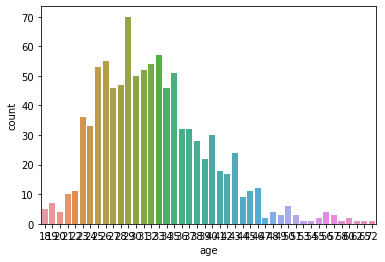

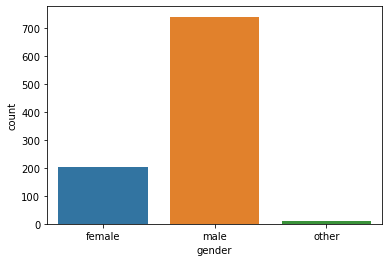

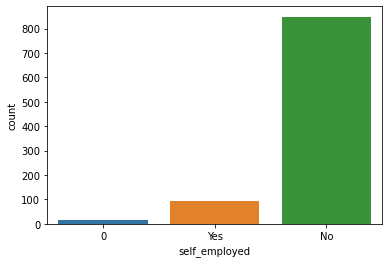

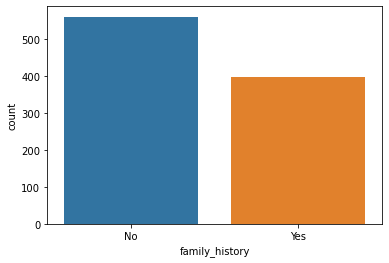

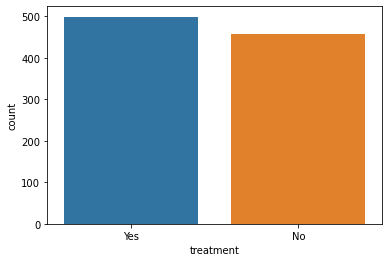

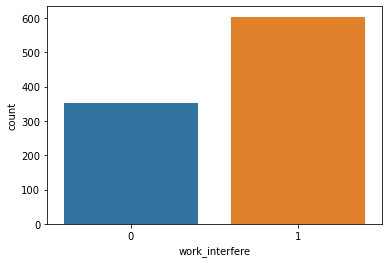

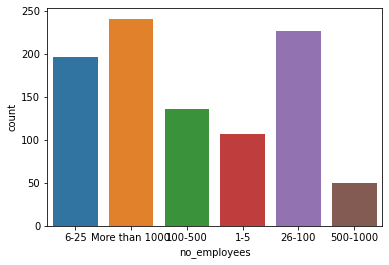

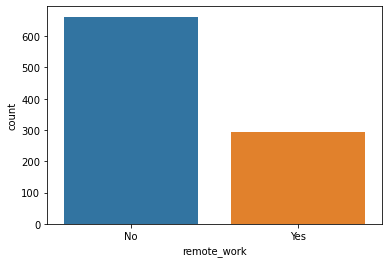

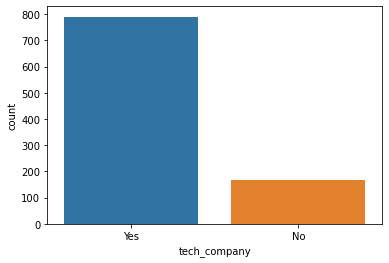

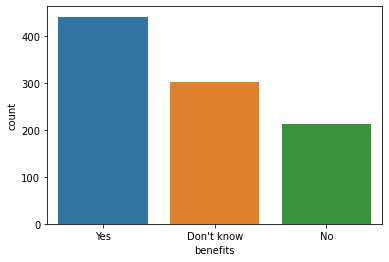

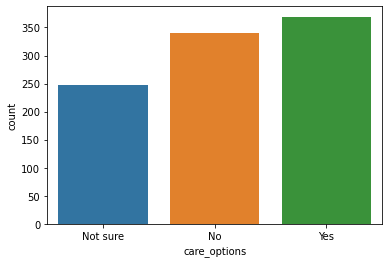

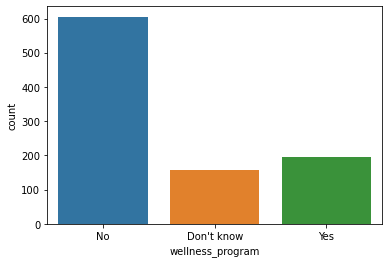

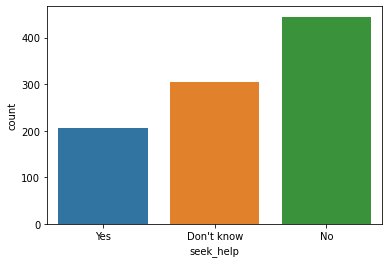

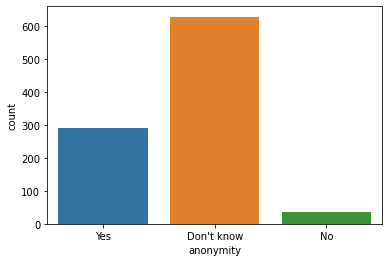

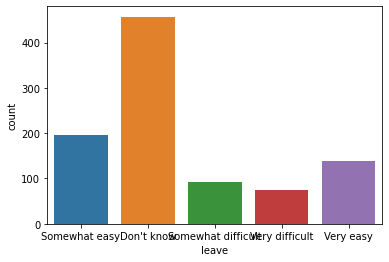

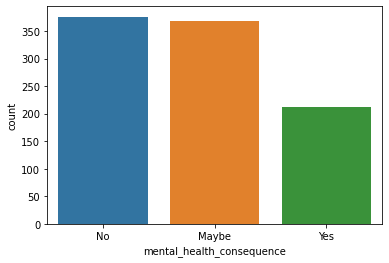

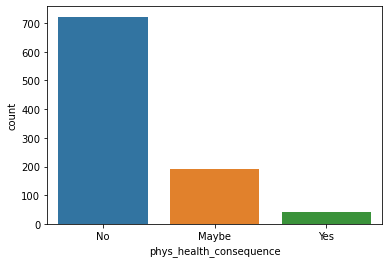

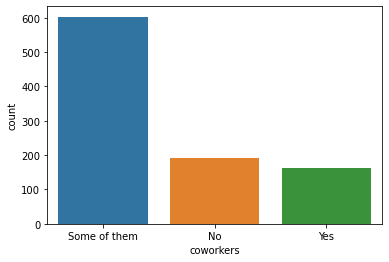

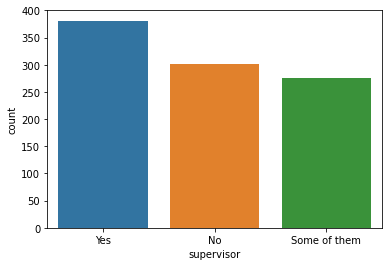

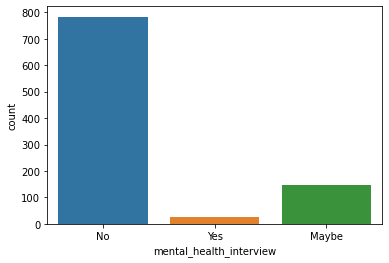

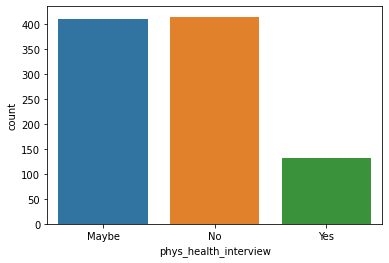

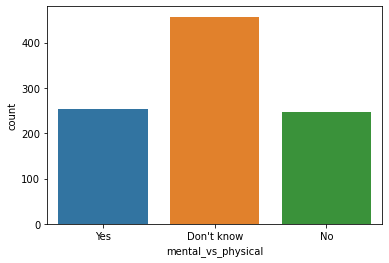

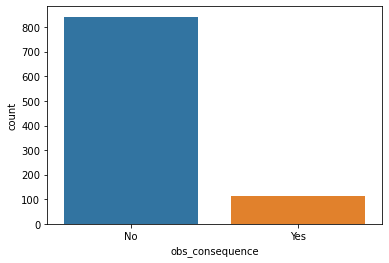

In [51]:
for x in train.columns:
    sns.countplot(survey_og[x])
    plt.show()

## Bivariate Exploration 

gender 
_____________________

        chi2   p-value  degrees of freedom
0  13.210684  0.001353                   2

observed:
 work_interfere    0    1  All
gender                       
female           30   94  124
male            167  241  408
other             0    3    3
All             197  338  535

expected:
             0           1
0   45.659813   78.340187
1  150.235514  257.764486
2    1.104673    1.895327


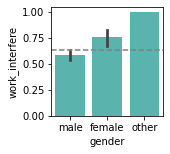


_____________________

self_employed 
_____________________

      chi2   p-value  degrees of freedom
0  1.26815  0.530426                   2

observed:
 work_interfere    0    1  All
self_employed                
0                 2    8   10
No              174  296  470
Yes              21   34   55
All             197  338  535

expected:
             0           1
0    3.682243    6.317757
1  173.065421  296.934579
2   20.252336   34.747664


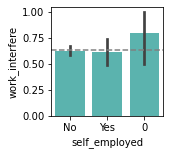


_____________________

family_history 
_____________________

        chi2       p-value  degrees of freedom
0  65.937187  4.655250e-16                   1

observed:
 work_interfere    0    1  All
family_history               
No              158  148  306
Yes              39  190  229
All             197  338  535

expected:
             0           1
0  112.676636  193.323364
1   84.323364  144.676636


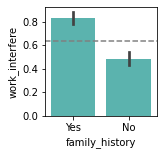


_____________________

treatment 
_____________________

         chi2       p-value  degrees of freedom
0  258.596955  3.470161e-58                   1

observed:
 work_interfere    0    1  All
treatment                    
No              184   71  255
Yes              13  267  280
All             197  338  535

expected:
             0           1
0   93.897196  161.102804
1  103.102804  176.897196


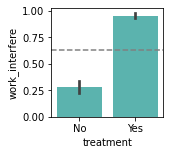


_____________________

work_interfere 
_____________________

         chi2        p-value  degrees of freedom
0  530.710058  1.979119e-117                   1

observed:
 work_interfere    0    1  All
work_interfere               
0               197    0  197
1                 0  338  338
All             197  338  535

expected:
             0           1
0   72.540187  124.459813
1  124.459813  213.540187


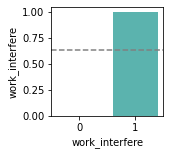


_____________________

no_employees 
_____________________

       chi2   p-value  degrees of freedom
0  9.221703  0.100541                   5

observed:
 work_interfere    0    1  All
no_employees                 
1-5              18   41   59
100-500          27   54   81
26-100           45   74  119
500-1000         18   12   30
6-25             34   69  103
More than 1000   55   88  143
All             197  338  535

expected:
            0          1
0  21.725234  37.274766
1  29.826168  51.173832
2  43.818692  75.181308
3  11.046729  18.953271
4  37.927103  65.072897
5  52.656075  90.343925


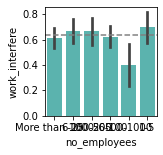


_____________________

remote_work 
_____________________

       chi2   p-value  degrees of freedom
0  0.178187  0.672936                   1

observed:
 work_interfere    0    1  All
remote_work                  
No              136  226  362
Yes              61  112  173
All             197  338  535

expected:
             0           1
0  133.297196  228.702804
1   63.702804  109.297196


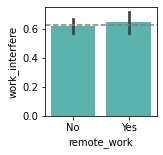


_____________________

tech_company 
_____________________

       chi2   p-value  degrees of freedom
0  1.450367  0.228469                   1

observed:
 work_interfere    0    1  All
tech_company                 
No               29   65   94
Yes             168  273  441
All             197  338  535

expected:
             0           1
0   34.613084   59.386916
1  162.386916  278.613084


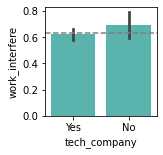


_____________________

benefits 
_____________________

        chi2   p-value  degrees of freedom
0  13.583282  0.001123                   2

observed:
 work_interfere    0    1  All
benefits                     
Don't know       84   93  177
No               37   69  106
Yes              76  176  252
All             197  338  535

expected:
            0           1
0  65.175701  111.824299
1  39.031776   66.968224
2  92.792523  159.207477


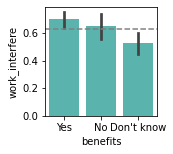


_____________________

care_options 
_____________________

        chi2  p-value  degrees of freedom
0  16.158273  0.00031                   2

observed:
 work_interfere    0    1  All
care_options                 
No               82  114  196
Not sure         61   73  134
Yes              54  151  205
All             197  338  535

expected:
            0           1
0  72.171963  123.828037
1  49.342056   84.657944
2  75.485981  129.514019


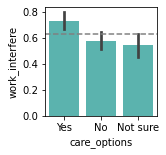


_____________________

wellness_program 
_____________________

       chi2   p-value  degrees of freedom
0  6.695231  0.035168                   2

observed:
 work_interfere      0    1  All
wellness_program               
Don't know         49   54  103
No                107  213  320
Yes                41   71  112
All               197  338  535

expected:
             0           1
0   37.927103   65.072897
1  117.831776  202.168224
2   41.241121   70.758879


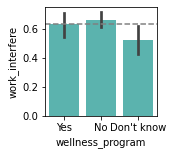


_____________________

seek_help 
_____________________

       chi2   p-value  degrees of freedom
0  4.107803  0.128234                   2

observed:
 work_interfere    0    1  All
seek_help                    
Don't know       75  101  176
No               76  155  231
Yes              46   82  128
All             197  338  535

expected:
            0           1
0  64.807477  111.192523
1  85.059813  145.940187
2  47.132710   80.867290


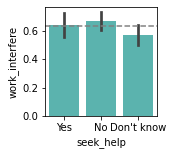


_____________________

anonymity 
_____________________

       chi2   p-value  degrees of freedom
0  0.710995  0.700825                   2

observed:
 work_interfere    0    1  All
anonymity                    
Don't know      132  215  347
No                7   15   22
Yes              58  108  166
All             197  338  535

expected:
             0           1
0  127.773832  219.226168
1    8.100935   13.899065
2   61.125234  104.874766


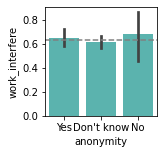


_____________________

leave 
_____________________

        chi2   p-value  degrees of freedom
0  19.494145  0.000628                   4

observed:
 work_interfere        0    1  All
leave                            
Don't know          115  151  266
Somewhat difficult   11   38   49
Somewhat easy        31   69  100
Very difficult        5   31   36
Very easy            35   49   84
All                 197  338  535

expected:
            0           1
0  97.947664  168.052336
1  18.042991   30.957009
2  36.822430   63.177570
3  13.256075   22.743925
4  30.930841   53.069159


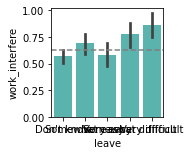


_____________________

mental_health_consequence 
_____________________

        chi2   p-value  degrees of freedom
0  15.407893  0.000451                   2

observed:
 work_interfere               0    1  All
mental_health_consequence               
Maybe                       69  122  191
No                          98  120  218
Yes                         30   96  126
All                        197  338  535

expected:
            0           1
0  70.330841  120.669159
1  80.272897  137.727103
2  46.396262   79.603738


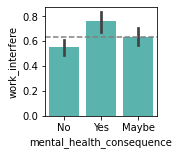


_____________________

phys_health_consequence 
_____________________

       chi2   p-value  degrees of freedom
0  7.734284  0.020918                   2

observed:
 work_interfere             0    1  All
phys_health_consequence               
Maybe                     27   80  107
No                       159  242  401
Yes                       11   16   27
All                      197  338  535

expected:
             0           1
0   39.400000   67.600000
1  147.657944  253.342056
2    9.942056   17.057944


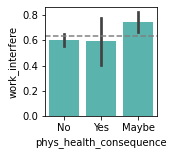


_____________________

coworkers 
_____________________

       chi2   p-value  degrees of freedom
0  0.176314  0.915617                   2

observed:
 work_interfere    0    1  All
coworkers                    
No               35   65  100
Some of them    128  216  344
Yes              34   57   91
All             197  338  535

expected:
             0           1
0   36.822430   63.177570
1  126.669159  217.330841
2   33.508411   57.491589


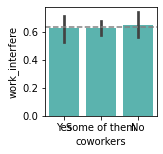


_____________________

supervisor 
_____________________

        chi2  p-value  degrees of freedom
0  15.597642  0.00041                   2

observed:
 work_interfere    0    1  All
supervisor                   
No               57  108  165
Some of them     38  109  147
Yes             102  121  223
All             197  338  535

expected:
            0           1
0  60.757009  104.242991
1  54.128972   92.871028
2  82.114019  140.885981


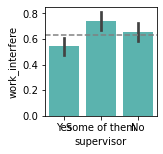


_____________________

mental_health_interview 
_____________________

        chi2   p-value  degrees of freedom
0  18.506319  0.000096                   2

observed:
 work_interfere             0    1  All
mental_health_interview               
Maybe                     49   38   87
No                       142  294  436
Yes                        6    6   12
All                      197  338  535

expected:
             0           1
0   32.035514   54.964486
1  160.545794  275.454206
2    4.418692    7.581308


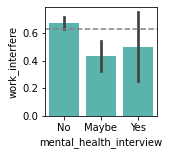


_____________________

phys_health_interview 
_____________________

      chi2   p-value  degrees of freedom
0  0.10079  0.950854                   2

observed:
 work_interfere           0    1  All
phys_health_interview               
Maybe                   89  148  237
No                      85  149  234
Yes                     23   41   64
All                    197  338  535

expected:
            0           1
0  87.269159  149.730841
1  86.164486  147.835514
2  23.566355   40.433645


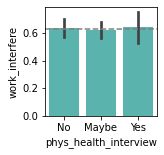


_____________________

mental_vs_physical 
_____________________

       chi2   p-value  degrees of freedom
0  7.571748  0.022689                   2

observed:
 work_interfere        0    1  All
mental_vs_physical               
Don't know          101  159  260
No                   33   91  124
Yes                  63   88  151
All                 197  338  535

expected:
            0           1
0  95.738318  164.261682
1  45.659813   78.340187
2  55.601869   95.398131


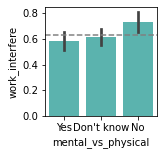


_____________________

obs_consequence 
_____________________

       chi2   p-value  degrees of freedom
0  4.346936  0.037076                   1

observed:
 work_interfere     0    1  All
obs_consequence               
No               184  295  479
Yes               13   43   56
All              197  338  535

expected:
             0           1
0  176.379439  302.620561
1   20.620561   35.379439


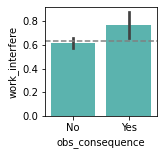


_____________________

age 
____________________



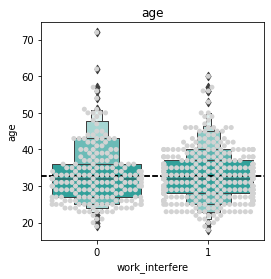

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________



In [52]:
tyler_explore.explore_bivariate(train, 'work_interfere', cat_vars, quant_vars)

### Bivariate Takeaways
    - Significant relationships:
        - Gender: .0005
        - Family history: 5.3e-16
        - Benefits: .052 (more investigation)
        - Care options: .001
        - Wellness program: .01
        - Seek help: .01
        - Anonymity: .037
        - Leave: .0077
        - mental_health_consequences: .0035
        - supervisor : .013
        - mental health: .016
        - mental_vs_physical: .01
        - obs_consequences: .019
    - Some of the values have a "dont know" column and they all are much less than yes or no. My theory is this is because people who need to access help or resources to get help probably looked into it because it was impacting work performance. 
        - companies larger than 1000 employees seem to have the least amount of impacts to work compared to the other sized companies
        - people who feel like their employer does not consider mental health to be similar to physical health report higher rates of impact to work. 
        - Feeling comfortable talking to a supervisor also reduces the impact to work performance
        - percieving that one would be punished for mental health also had a higher rate of impact to work performance
        - observing negative consequences to others in the company hurts work performance
        - the easier it is to get leave the less impact to work performacne there is

In [53]:
survey_og.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [54]:
cat1 = survey_og[['gender', 'self_employed', 'family_history']]
cat2 = survey_og[['treatment', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options']]
cat3 = survey_og[['wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence']]
cat4 = survey_og[['coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']]

printing swarmgrid...


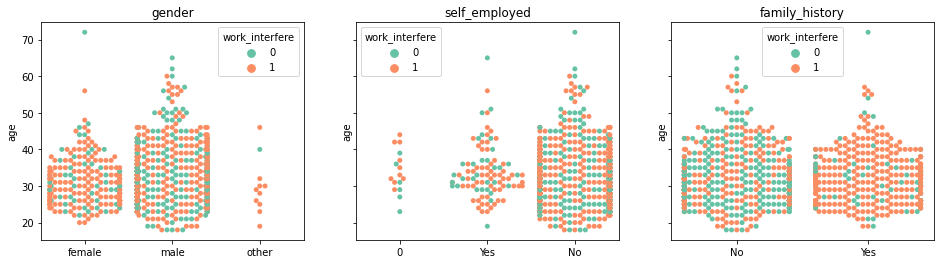

making violin...


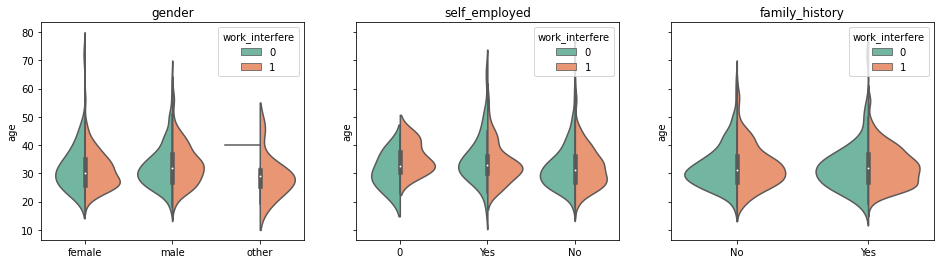

making pairplot...


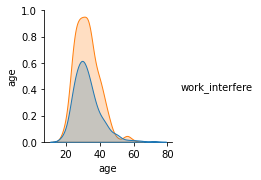

plotting continuous vars


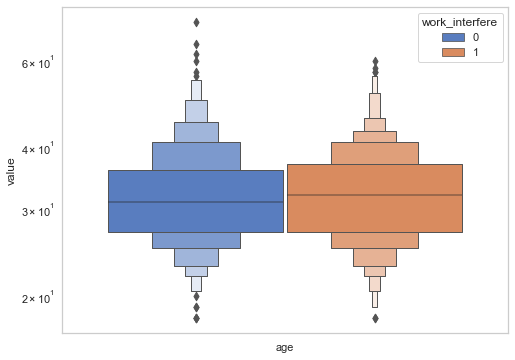

In [55]:
tyler_explore.explore_multivariate(survey_og, 'work_interfere', list(cat1.columns), quant_vars.columns)

printing swarmgrid...


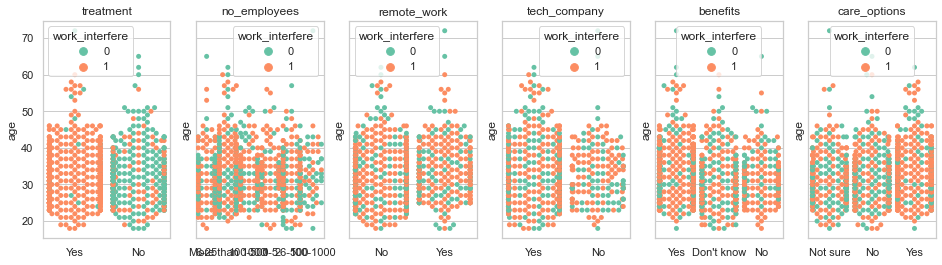

making violin...


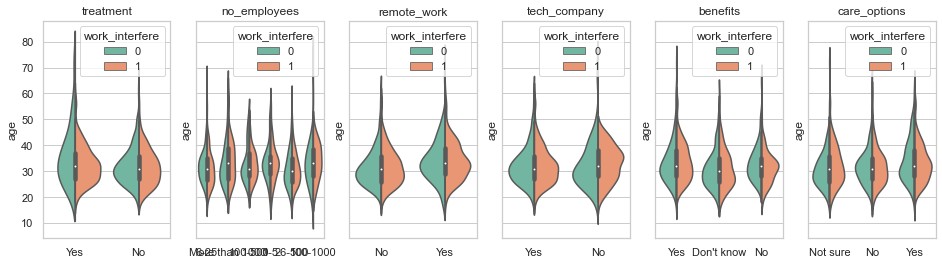

making pairplot...


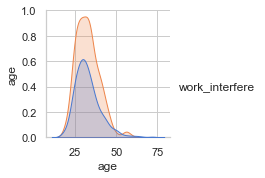

plotting continuous vars


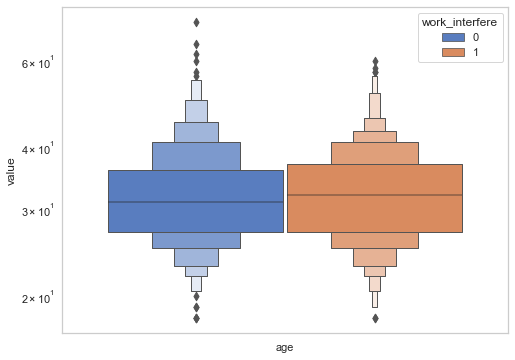

In [56]:
tyler_explore.explore_multivariate(survey_og, 'work_interfere', list(cat2.columns), quant_vars.columns)

printing swarmgrid...


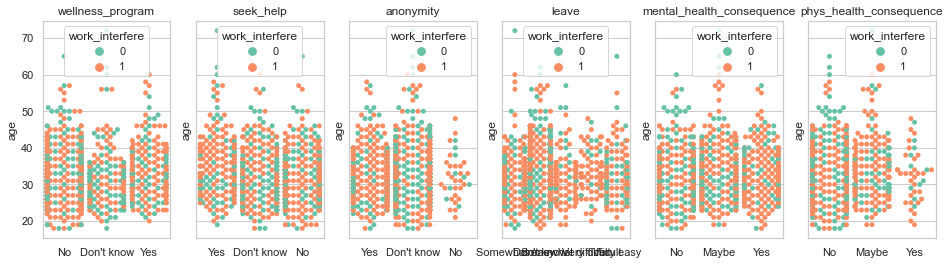

making violin...


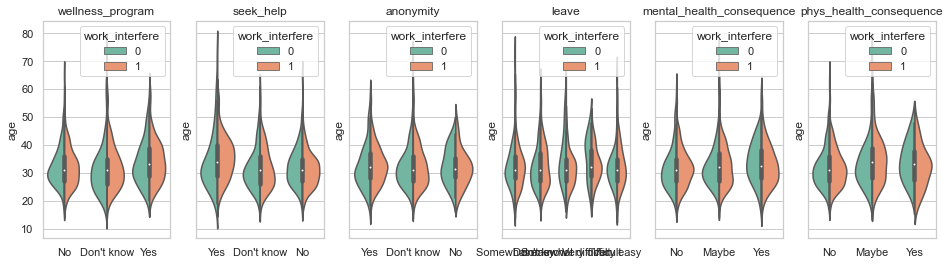

making pairplot...


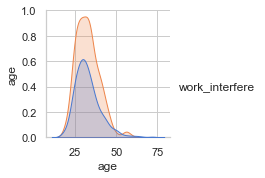

plotting continuous vars


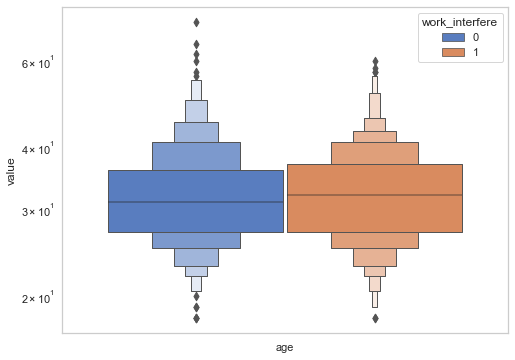

In [57]:
tyler_explore.explore_multivariate(survey_og, 'work_interfere', list(cat3.columns), quant_vars.columns)

printing swarmgrid...


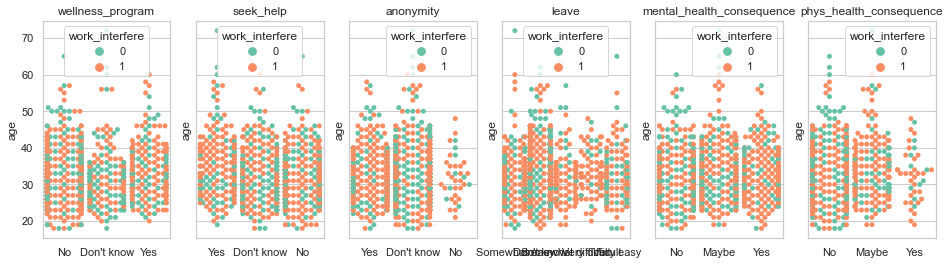

making violin...


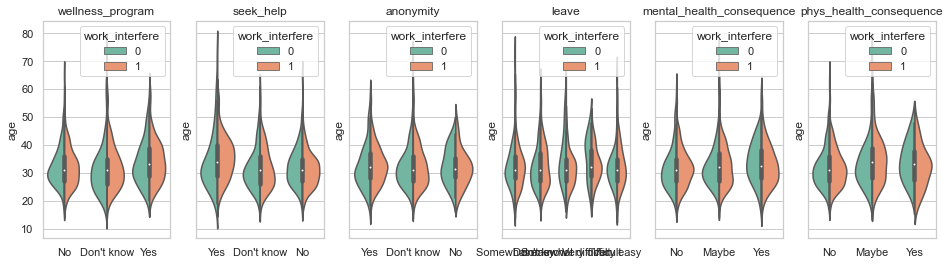

making pairplot...


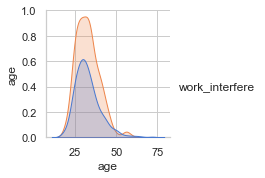

plotting continuous vars


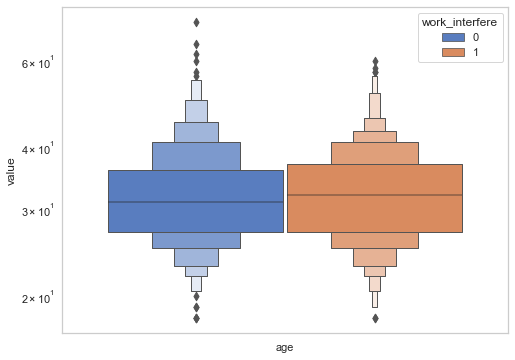

In [58]:
tyler_explore.explore_multivariate(survey_og, 'work_interfere', list(cat3.columns), quant_vars.columns)

printing swarmgrid...


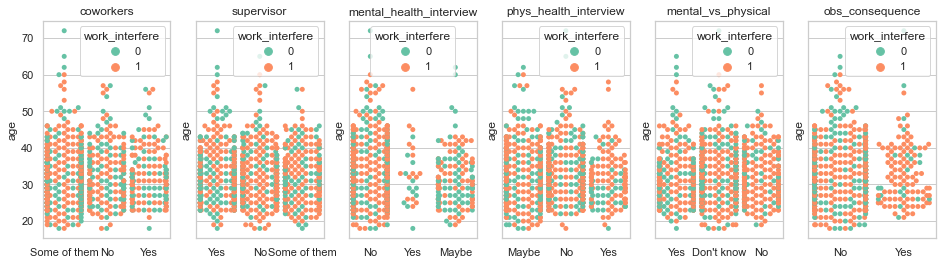

making violin...


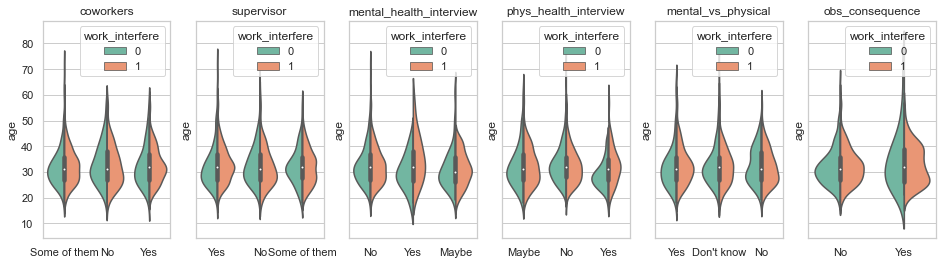

making pairplot...


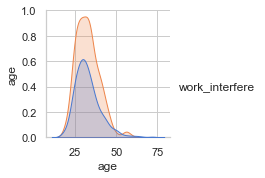

plotting continuous vars


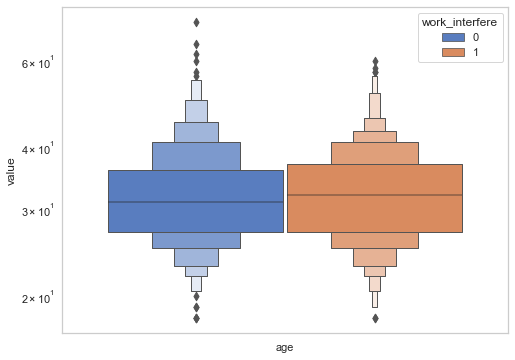

In [59]:
tyler_explore.explore_multivariate(survey_og, 'work_interfere', list(cat4.columns), quant_vars.columns)